In [2]:
import pandas as pd

df_all = pd.read_csv('Testing_set2_results_new.csv')

print df_all.columns

Index([u'Unnamed: 0', u'AA', u'Acetylation', u'CRISPRO_score',
       u'CRISPRscan.score', u'Chari.rank', u'Chari.score', u'Chr', u'DSB_coor',
       u'DeepCRISPR_score', u'DeepHF_score', u'Domain_pfam',
       u'Essential_Zscore', u'FrameShift_FORECasT', u'FrameShift_IndelPhi',
       u'FrameShift_Lindel', u'Helix', u'Index', u'LoF_com', u'LoF_ind',
       u'LoF_pro', u'LoF_seq', u'PROVEAN_score', u'Phosphorylation',
       u'SIFT_score', u'SSC_score', u'Score', u'Sheet', u'Symbol',
       u'Unnamed: 0.1', u'Wang.score', u'WuCRISPR.score', u'dataset',
       u'doench_score', u'loci_longseq', u'longseq100bp', u'sgRNASeq',
       u'strand'],
      dtype='object')


In [3]:
for data in list(set(df_all['dataset'])):
    print data
    df = df_all[df_all['dataset']==data]
    df_data = df.loc[:,[u'AA', u'Acetylation', u'CRISPRO_score',
       u'CRISPRscan.score', u'Chari.rank', u'Chari.score', u'Chr', u'DSB_coor',
       u'DeepCRISPR_score', u'DeepHF_score', u'Domain_pfam',
       u'Essential_Zscore', u'FrameShift_FORECasT', u'FrameShift_IndelPhi',
       u'FrameShift_Lindel', u'Helix', u'Index', u'PROVEAN_score', u'Phosphorylation',
       u'SIFT_score', u'SSC_score', u'Score', u'Sheet', u'Symbol',
       u'Wang.score', u'WuCRISPR.score', u'dataset',
       u'doench_score', u'loci_longseq', u'longseq100bp', u'sgRNASeq',
       u'strand']]
    
    df_data.to_csv('Testing_'+data+'.csv',index=False)

Sanjana2014_GeCKOv2
Evers2016-UMUC3
Bertomeu2018-EKO-NALM6
Schoonenberg2018-CRISPRO
Evers2016-RT112


In [8]:
def seqsToChariSvml(seqs):
    """ partially copied from generateSVMFile.FASTA.py in the Chari et al source code
    >>> seqsToChariSvml(["CTTCTTCAAGGTAACTGCAGA", "CTTCTTCAAGGTAACTGGGGG"])
    '0 13:1 22:1 32:1 43:1 52:1 62:1 73:1 84:1 94:1 101:1 111:1 122:1 134:1 144:1 153:1 162:1 171:1 183:1 194:1 201:1 214:1\\n0 13:1 22:1 32:1 43:1 52:1 62:1 73:1 84:1 94:1 101:1 111:1 122:1 134:1 144:1 153:1 162:1 171:1 181:1 191:1 201:1 211:1'
    """
    vecs = []
    for seq in seqs:
        assert(len(seq)==21)
        vec = []
        # end index
        for pos in range(0, 21):
            for nuclIdx, char in enumerate("GTCA"):
                val = int(seq[pos]==char)
                if val!=0:
                    vec.append( ("%d%d" % (pos+1, nuclIdx+1), val) )
        vecs.append( vec )

    lines = []
    for vec in vecs:
        vec = ["%s:%s" % (x,y) for x,y in vec]
        lines.append("0 "+" ".join(vec))
    return "\n".join(lines)

seqsToChariSvml(["CTTCTTCAAGGTAACTGCAGA", "CTTCTTCAAGGTAACTGGGGG"])

'0 13:1 22:1 32:1 43:1 52:1 62:1 73:1 84:1 94:1 101:1 111:1 122:1 134:1 144:1 153:1 162:1 171:1 183:1 194:1 201:1 214:1\n0 13:1 22:1 32:1 43:1 52:1 62:1 73:1 84:1 94:1 101:1 111:1 122:1 134:1 144:1 153:1 162:1 171:1 181:1 191:1 201:1 211:1'

In [6]:
### CRISPRscan

paramsCRISPRscan = [
# converted excel table of logistic regression weights with 1-based positions
('AA',18,-0.097377097),
('TT',18,-0.094424075),('TT',13,-0.08618771),('CT',26,-0.084264893),('GC',25,-0.073453609),
('T',21,-0.068730497),('TG',23,-0.066388075),('AG',23,-0.054338456),('G',30,-0.046315914),
('A',4,-0.042153521),('AG',34,-0.041935908),('GA',34,-0.037797707),('A',18,-0.033820432),
('C',25,-0.031648353),('C',31,-0.030715556),('G',1,-0.029693709),('C',16,-0.021638609),
('A',14,-0.018487229),('A',11,-0.018287292),('T',34,-0.017647692),('AA',10,-0.016905415),
('A',19,-0.015576499),('G',34,-0.014167123),('C',30,-0.013182733),('GA',31,-0.01227989),
('T',24,-0.011996172),('A',15,-0.010595296),('G',4,-0.005448869),('GG',9,-0.00157799),
('T',23,-0.001422243),('C',15,-0.000477727),('C',26,-0.000368973),('T',27,-0.000280845),
('A',31,0.00158975),('GT',18,0.002391744),('C',9,0.002449224),('GA',20,0.009740799),
('A',25,0.010506405),('A',12,0.011633235),('A',32,0.012435231),('T',22,0.013224035),
('C',20,0.015089514),('G',17,0.01549378),('G',18,0.016457816),('T',30,0.017263162),
('A',13,0.017628924),('G',19,0.017916844),('A',27,0.019126815),('G',11,0.020929039),
('TG',3,0.022949996),('GC',3,0.024681785),('G',14,0.025116714),('GG',10,0.026802158),
('G',12,0.027591138),('G',32,0.03071249),('A',22,0.031930909),('G',20,0.033957008),
('C',21,0.034262921),('TT',17,0.03492881),('T',13,0.035445171),('G',26,0.036146649),
('A',24,0.037466478),('C',22,0.03763162),('G',16,0.037970942),('GG',12,0.041883009),
('TG',18,0.045908991),('TG',31,0.048136812),('A',35,0.048596259),('G',15,0.051129717),
('C',24,0.052972314),('TG',15,0.053372822),('GT',11,0.053678436),('GC',9,0.054171402),
('CA',30,0.057759851),('GT',24,0.060952114),('G',13,0.061360905),('CA',24,0.06221937),
('AG',10,0.063717093),('G',10,0.067739182),('C',13,0.069495944),('GT',31,0.07342535),
('GG',13,0.074355848),('C',27,0.079933922),('G',27,0.085151052),('CC',21,0.088919601),
('CC',23,0.095072286),('G',22,0.10114438),('G',24,0.105488325),('GT',23,0.106718563),
('GG',25,0.111559441),('G',9,0.114600681)]

def calcCrisprScanScores(seqs):
    """ input is a 35bp long sequence: 6bp 5', 20bp guide, 3 bp PAM and 6bp 3'
    >>> calcCrisprScanScores(["TCCTCTGGTGGCGCTGCTGGATGGACGGGACTGTA"])
    [77]
    """
    scores = []
    for seq in seqs:
        assert(len(seq)==35)
        intercept = 0.183930943629
        score = intercept
        for modelSeq, pos, weight in paramsCRISPRscan:
            subSeq = seq[pos-1:pos+len(modelSeq)-1]
            if subSeq==modelSeq:
                score += weight
        scores.append(int(100*score))
    return scores

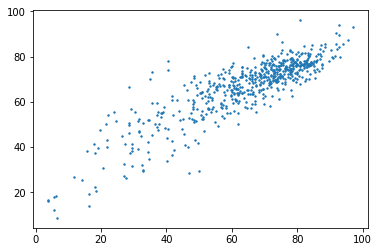

In [3]:
import matplotlib.pyplot as plt 

plt.scatter(df['FrameShift_IndelPhi'],df['FrameShift_FORECasT'],s=2)
plt.show()

In [5]:
df_old = pd.read_csv('Testing_chari2015_293T_wei.csv')

print df_old.columns

Index([u'Unnamed: 0', u'dataset', u'guide', u'seq', u'modFreq', u'db',
       u'position', u'longSeq100Bp', u'chariRank', u'chariRaw', u'crisprScan',
       u'doench', u'drsc', u'finalGc6', u'finalGg', u'fusi', u'mh', u'oof',
       u'ssc', u'wang', u'wangOrig', u'wuCrispr', u'Deep_score',
       u'FrameShift_IndelPhi', u'Deep.oscar', u'Doench_score', u'SSC_score',
       u'AA.loc', u'SIFT.score', u'Domain', u'Helix', u'Sheet',
       u'PROVEAN.score', u'Pho.kde', u'Ace.kde'],
      dtype='object')


In [ ]:
# this library re-implements the efficiency scoring functions of these articles:

# - WangSvm: Wang et al, Science 2014, PMID 24336569, no website
# - Doench: Doench et al, Nat Biotech 2014, PMID 25184501, http://www.broadinstitute.org/rnai/public/analysis-tools/sgrna-design
# - CrisprScan: Moreno-Mateos, Nat Meth 2015, PMID 26322839, http://crisprscan.org
# - ssc: Xu et al, Gen Res 2015, PMID 26063738, http://crispr.dfci.harvard.edu/SSC/
# - Chari: Chari et al, PMID 26167643 http://crispr.med.harvard.edu/sgRNAScorer
# - Fusi: Fusi et al, prepublication manuscript on bioarxiv, http://dx.doi.org/10.1101/021568 http://research.microsoft.com/en-us/projects/azimuth/, only available as a web API
# - Housden: Housden et al, PMID 26350902, http://www.flyrnai.org/evaluateCrispr/
# - OOF: Microhomology and out-of-frame score from Bae et al, Nat Biotech 2014 , PMID24972169 http://www.rgenome.net/mich-calculator/
# - Wu-Crispr: Wong et al, PMID, http://www.genomebiology.com/2015/16/1/218

# the input are 100bp sequences that flank the basepair just 5' of the PAM +/-50bp.
# so 50bp 5' of the PAM, and 47bp 3' of the PAM -> 100bp

# this module uses pipes to feed data into some programs
# If you run too many sequences at once, it may hang. Increase the BUFSIZE variable in this case.

from subprocess import Popen, PIPE, STDOUT, check_output, CalledProcessError, call
import platform, math, tempfile, bisect, sys, os, logging, types, optparse, shutil
from os.path import dirname, join, basename, isfile, expanduser, isdir, abspath
from math import log10

import urllib2, pickle
import json

fusiDir = join(dirname(__file__), "bin/fusiDoench")
sys.path.insert(0, join(fusiDir, "analysis"))

import model_comparison

# import numpy as np

# global that points to the crispor 'bin' directory with the external executables
# like libsvm and svmlight
global binDir
binDir = None

# the name of a directory to use for caching some efficiency values that are slow to calculate
# deactivated by default
cacheDir = None

# by default bindir is relative to the location of this library
if binDir is None:
    binDir = join(dirname(__file__), "bin")

BUFSIZE = 10000000

def setBinDir(path):
    global binDir
    binDir = path

def setCacheDir(path):
    global cacheDir
    cacheDir = path

def getBinPath(name, isDir=False):
    """
    get the full pathname of a platform-specific binary, in the bin/ directory relative to this directory
    """
    currPlatform = platform.system()
    #myDir = dirname(join(__file__))
    binPath = join(binDir, currPlatform, name)
    if isDir and not isdir(binPath):
        raise Exception("Could not find directory %s" % binPath)
    if not isDir and not isfile(binPath):
        raise Exception("Could not find file %s" % binPath)
    return binPath

def seqToVec(seq, offsets={"A":0,"C":1,"G":2,"T":3}):
    """ convert a x bp sequence to a 4 * x 0/1 vector
    >>> seqToVec("AAAAATTTTTGGGGGCCCCC")
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]
    """
    assert(len(seq)==20)
    row = [0]*len(seq)*4
    pseudoOffset = offsets["A"]
    for pos, nucl in enumerate(seq):
        nucl = nucl.upper()
        # treat N, Y, etc like "A". Happens very rarely.
        nuclOffset = offsets.get(nucl, pseudoOffset)
        vecPos = (pos*len(offsets))+nuclOffset
        #if vecPos not in range(len(row)):
            #ofh = open("temp.txt", "a")
            #ofh.write(str(vecPos)+" "+seq+" "+str(row)+"pos %d, nucl %s" % (pos, nucl)+"\n")
            #assert(False)
        row[vecPos] = 1
    return row

def vecToSeqDicts(coefs):
    " convert a list of 80 floats to 20 dictionaries with A/C/T/G -> float "
    freqs = []
    for i in range(0,20):
        charFreqs = {}
        for nucl, x in zip("ACGT", range(0,4)):
            freq = coefs[i*4+x]
            if freq==0.0:
                continue
            charFreqs[nucl] = freq
        freqs.append(charFreqs)
    return freqs

paramsCRISPRscan = [
# converted excel table of logistic regression weights with 1-based positions
('AA',18,-0.097377097),
('TT',18,-0.094424075),('TT',13,-0.08618771),('CT',26,-0.084264893),('GC',25,-0.073453609),
('T',21,-0.068730497),('TG',23,-0.066388075),('AG',23,-0.054338456),('G',30,-0.046315914),
('A',4,-0.042153521),('AG',34,-0.041935908),('GA',34,-0.037797707),('A',18,-0.033820432),
('C',25,-0.031648353),('C',31,-0.030715556),('G',1,-0.029693709),('C',16,-0.021638609),
('A',14,-0.018487229),('A',11,-0.018287292),('T',34,-0.017647692),('AA',10,-0.016905415),
('A',19,-0.015576499),('G',34,-0.014167123),('C',30,-0.013182733),('GA',31,-0.01227989),
('T',24,-0.011996172),('A',15,-0.010595296),('G',4,-0.005448869),('GG',9,-0.00157799),
('T',23,-0.001422243),('C',15,-0.000477727),('C',26,-0.000368973),('T',27,-0.000280845),
('A',31,0.00158975),('GT',18,0.002391744),('C',9,0.002449224),('GA',20,0.009740799),
('A',25,0.010506405),('A',12,0.011633235),('A',32,0.012435231),('T',22,0.013224035),
('C',20,0.015089514),('G',17,0.01549378),('G',18,0.016457816),('T',30,0.017263162),
('A',13,0.017628924),('G',19,0.017916844),('A',27,0.019126815),('G',11,0.020929039),
('TG',3,0.022949996),('GC',3,0.024681785),('G',14,0.025116714),('GG',10,0.026802158),
('G',12,0.027591138),('G',32,0.03071249),('A',22,0.031930909),('G',20,0.033957008),
('C',21,0.034262921),('TT',17,0.03492881),('T',13,0.035445171),('G',26,0.036146649),
('A',24,0.037466478),('C',22,0.03763162),('G',16,0.037970942),('GG',12,0.041883009),
('TG',18,0.045908991),('TG',31,0.048136812),('A',35,0.048596259),('G',15,0.051129717),
('C',24,0.052972314),('TG',15,0.053372822),('GT',11,0.053678436),('GC',9,0.054171402),
('CA',30,0.057759851),('GT',24,0.060952114),('G',13,0.061360905),('CA',24,0.06221937),
('AG',10,0.063717093),('G',10,0.067739182),('C',13,0.069495944),('GT',31,0.07342535),
('GG',13,0.074355848),('C',27,0.079933922),('G',27,0.085151052),('CC',21,0.088919601),
('CC',23,0.095072286),('G',22,0.10114438),('G',24,0.105488325),('GT',23,0.106718563),
('GG',25,0.111559441),('G',9,0.114600681)]

def calcCrisprScanScores(seqs):
    """ input is a 35bp long sequence: 6bp 5', 20bp guide, 3 bp PAM and 6bp 3'
    >>> calcCrisprScanScores(["TCCTCTGGTGGCGCTGCTGGATGGACGGGACTGTA"])
    [77]
    """
    scores = []
    for seq in seqs:
        assert(len(seq)==35)
        intercept = 0.183930943629
        score = intercept
        for modelSeq, pos, weight in paramsCRISPRscan:
            subSeq = seq[pos-1:pos+len(modelSeq)-1]
            if subSeq==modelSeq:
                score += weight
        scores.append(int(100*score))
    return scores

def listToSvml(vec, res):
    """ convert a list of values to a line in svml format line like "+1 1:0.5 2:1.5 ...
    """
    parts = [str(res)]
    for i, val in enumerate(vec):
        parts.append("%d:%d" % (i+1, val))
    return " ".join(parts)

def calcWangSvmScores(seqs):
    """
    Use the wang.model file to score sequences. Input is only the 20bp guide sequence.
    Uses libsvm's svm-predict program, V2.6.
    The score is inversed, so higher scores are better, like all other scores
    The results here are off mostly by 1-5% from the results returned by the Wang et al source code.
    I never found out why, there are no parameters for "svm_predict". Should not be due to a version
    difference either, I'm using the same libsvm version as the e1071 R module.
    This is necessary for a web server implementation as e1071 in R cannot read the model from a file.
    The original implementation from the paper can be called with calcWangSvmScoresUsingR()
    See compareWangScores.py:
    The Pearson correlation between both ways to calculate the score is 97%.
    Histogram of the score differences:
    0.000000 ************************************************************ 3074
    0.050000 ********************************* 1674
    0.100000 ************ 612
    0.150000 **** 191
    0.200000 * 52
    0.250000  7
    0.300000  1
    cat out/wangDiffs.tsv | cut -f4 | tr -d '-' | grep -v diff | textHistogram stdin stdout -real -binSize=0.05
    >>> calcWangSvmScores(["ATAGACCTACCTTGTTGAAG"])
    [60]
    >>> calcWangSvmScores(["NTAGACCTACCTTGTTGAAG"])
    [60]
    """
    scores = []
    vecOrder = {"A":0, "C":1, "T":2, "G":3}

    lines = []
    for seq in seqs:
        seq = seq.upper()
        assert(len(seq)==20)
        vec = seqToVec(seq, offsets=vecOrder)
        lines.append(listToSvml(vec, 0))

    dataIn = "\n".join(lines)
    binPath = getBinPath("svm-predict")
    modelFname = join(binDir, "src", "wangSabatiniSvm", "wang.model")
    cmd = [binPath, "-b", "1", "/dev/stdin", modelFname, "/dev/stdout"]
    proc = Popen(cmd,stdout=PIPE, stdin=PIPE, stderr=None, bufsize=BUFSIZE)
    dataOut = proc.communicate(input=dataIn)[0]

    lines = dataOut.splitlines()
    for line in lines:
        if line.startswith("labels"):
            continue
        if line.startswith("Accuracy"):
            break
        score = int(100*(1.0 - float(line.split()[-1])))
        scores.append(score)

    return scores

# DOENCH SCORING 
doenchParams = [
# pasted/typed table from PDF and converted to zero-based positions
(1,'G',-0.2753771),(2,'A',-0.3238875),(2,'C',0.17212887),(3,'C',-0.1006662),
(4,'C',-0.2018029),(4,'G',0.24595663),(5,'A',0.03644004),(5,'C',0.09837684),
(6,'C',-0.7411813),(6,'G',-0.3932644),(11,'A',-0.466099),(14,'A',0.08537695),
(14,'C',-0.013814),(15,'A',0.27262051),(15,'C',-0.1190226),(15,'T',-0.2859442),
(16,'A',0.09745459),(16,'G',-0.1755462),(17,'C',-0.3457955),(17,'G',-0.6780964),
(18,'A',0.22508903),(18,'C',-0.5077941),(19,'G',-0.4173736),(19,'T',-0.054307),
(20,'G',0.37989937),(20,'T',-0.0907126),(21,'C',0.05782332),(21,'T',-0.5305673),
(22,'T',-0.8770074),(23,'C',-0.8762358),(23,'G',0.27891626),(23,'T',-0.4031022),
(24,'A',-0.0773007),(24,'C',0.28793562),(24,'T',-0.2216372),(27,'G',-0.6890167),
(27,'T',0.11787758),(28,'C',-0.1604453),(29,'G',0.38634258),(1,'GT',-0.6257787),
(4,'GC',0.30004332),(5,'AA',-0.8348362),(5,'TA',0.76062777),(6,'GG',-0.4908167),
(11,'GG',-1.5169074),(11,'TA',0.7092612),(11,'TC',0.49629861),(11,'TT',-0.5868739),
(12,'GG',-0.3345637),(13,'GA',0.76384993),(13,'GC',-0.5370252),(16,'TG',-0.7981461),
(18,'GG',-0.6668087),(18,'TC',0.35318325),(19,'CC',0.74807209),(19,'TG',-0.3672668),
(20,'AC',0.56820913),(20,'CG',0.32907207),(20,'GA',-0.8364568),(20,'GG',-0.7822076),
(21,'TC',-1.029693),(22,'CG',0.85619782),(22,'CT',-0.4632077),(23,'AA',-0.5794924),
(23,'AG',0.64907554),(24,'AG',-0.0773007),(24,'CG',0.28793562),(24,'TG',-0.2216372),
(26,'GT',0.11787758),(28,'GG',-0.69774)]

def calcDoenchScores(seqs):
    """
    Code reproduced following paper's methods section. Thanks to Daniel McPherson for fixing it.
    Input is a 30mer: 4bp 5', 20bp guide, 3bp PAM, 3bp 5'
    """
    intercept =  0.59763615
    gcHigh    = -0.1665878
    gcLow     = -0.2026259

    scores = []
    for seq in seqs:
        assert(len(seq)==30)
        score = intercept

        guideSeq = seq[4:24]
        gcCount = guideSeq.count("G") + guideSeq.count("C")
        if gcCount <= 10:
            gcWeight = gcLow
        if gcCount > 10:
            gcWeight = gcHigh
        score += abs(10-gcCount)*gcWeight

        for pos, modelSeq, weight in doenchParams:
            subSeq = seq[pos:pos+len(modelSeq)]
            if subSeq==modelSeq:
                score += weight
        expScore = int(100*(1.0/(1.0+math.exp(-score))))
        scores.append(expScore)

    return scores

def calcSscScores(seqs):
    """ calc the SSC scores from the paper Xu Xiao Chen Li Meyer Brown Lui Gen Res 2015 
    Input is a 30mer, 20bp for the guide, 3bp PAM, 7bp 3' flanking
    >>> calcSscScores(["AGCAGGATAGTCCTTCCGAGTGGAGGGAGG"])
    [0.182006]
    """
    assert(len(seqs)!=0) # need at least one sequence
    strList = []
    for s in seqs:
        assert(len(s)==30)
        strList.append("%s 0 0 + dummy" % s)
    sscIn = "\n".join(strList)

    # ../../Darwin/SSC -i /dev/stdin  -o /dev/stdout -l 30 -m matrix/human_mouse_CRISPR_KO_30bp.matrix 
    # AGCAGGATAGTCCTTCCGAGTGGAGGGAGG  187 216 -   MYC_exon3_hg19
    # AGCAGGATAGTCCTTCCGAGTGGAGGGAGG  0 0 -   t
    # AGCAGGATAGTCCTTCCGAGTGGAGGGAGG  187 216 -   MYC_exon3_hg19  0.182006
    sscPath = getBinPath("SSC")
    matPath = join(binDir, "src", "SSC0.1", "matrix", "human_mouse_CRISPR_KO_30bp.matrix")
    cmd = [sscPath, "-i", "/dev/stdin", "-o", "/dev/stdout", "-l", "30", "-m", matPath]
    try:
        stdout, stderr = Popen(cmd, stdin=PIPE, stdout=PIPE, bufsize=BUFSIZE).communicate(sscIn)
    except OSError:
        raise Exception("Cannot run command %s" % " ".join(cmd))
    scores = {}
    i = 0
    for lineIdx, line in enumerate(stdout.split("\n")):
        fs = line.split()
        if "Processing failed" in line:
            raise Exception("SSC returned error, line %d" % lineIdx)
        seq, score = fs[0], float(fs[-1])
        scores[seq] = score
        lineIdx += 1
        if lineIdx==len(seqs):
            break

    scoreList = []
    # make sure we got a score for each input sequence
    for s in seqs:
        scoreList.append(scores[s])
        
    return scoreList

def seqsToChariSvml(seqs):
    """ partially copied from generateSVMFile.FASTA.py in the Chari et al source code
    >>> seqsToChariSvml(["CTTCTTCAAGGTAACTGCAGA", "CTTCTTCAAGGTAACTGGGGG"])
    '0 13:1 22:1 32:1 43:1 52:1 62:1 73:1 84:1 94:1 101:1 111:1 122:1 134:1 144:1 153:1 162:1 171:1 183:1 194:1 201:1 214:1\\n0 13:1 22:1 32:1 43:1 52:1 62:1 73:1 84:1 94:1 101:1 111:1 122:1 134:1 144:1 153:1 162:1 171:1 181:1 191:1 201:1 211:1'
    """
    vecs = []
    for seq in seqs:
        assert(len(seq)==21)
        vec = []
        # end index
        for pos in range(0, 21):
            for nuclIdx, char in enumerate("GTCA"):
                val = int(seq[pos]==char)
                if val!=0:
                    vec.append( ("%d%d" % (pos+1, nuclIdx+1), val) )
        vecs.append( vec )

    lines = []
    for vec in vecs:
        vec = ["%s:%s" % (x,y) for x,y in vec]
        lines.append("0 "+" ".join(vec))
    return "\n".join(lines)

chariRanges = None

def convertChariToRankPerc(score):
    """
    convert chari score to rank percent using only 2 digits precision. A lot faster than
    the version in the paper.
    """
    global chariRanges
    if chariRanges is None:
        # parse values
        fname = join(binDir, "src", "sgRNA.Scorer.1.0", "Hg19.RefFlat.Genes.75bp.NoUTRs.SPSites.SVMOutput.ranges.txt")
        ranges = open(fname).read().splitlines()
        ranges = [float(x) for x in ranges]

    # use bisection to find the right value
    fastPerc = bisect.bisect(ranges, score)-1

    # the old, slow way
    #fname = join(binDir, "src", "sgRNA.Scorer.1.0", "Hg19.RefFlat.Genes.75bp.NoUTRs.SPSites.SVMOutput.txt")
    #allData = open(fname).read().splitlines()
    #allData = np.array([float(x) for x in allData])
    #slowPerc = 100.0*(allData[allData < score].size / float(allData.size))
    return fastPerc

def calcChariScores(seqs, baseDir="."):
    """ return dict with chari 2015 scores, returns two lists (rawScores, rankPercent)
    input seqs have lengths 21bp: 20 bp guide + 1bp first from PAM
    >>> calcChariScores(["CTTCTTCAAGGTAACTGCAGA", "CTTCTTCAAGGTAACTGGGGG"])
    ([0.54947621, 0.58604487], [80, 81])
    """
    # this is a rewritten version of scoreMySites.py in the Chari2015 suppl files
    chariDir = join(binDir, "src", "sgRNA.Scorer.1.0")
    modelFname = join(chariDir,'293T.HiSeq.SP.Nuclease.100.SVM.Model.txt')
    dataIn = seqsToChariSvml(seqs)
    #print repr(dataIn)

    #tempFh = tempfile.NamedTemporaryFile()
    tempFname = tempfile.mktemp()
    #tempFh = open("temp3.txt", "w")
    tempFh = open(tempFname, "w")
    tempFh.write(dataIn+"\n")
    tempFh.close()
    #tempFname = tempFh.name
    #tempFh.close()

    #outTempFh = tempfile.NamedTemporaryFile()
    #outName = outTempFh.name
    outName = tempfile.mktemp()

    svmlPath = getBinPath("svm_classify")
    cmd = [svmlPath, "-v", "0", tempFname, modelFname, outName]
    try:
        proc = call(cmd)
    except CalledProcessError:
        raise Exception("Could not run command '%s'" % (" ".join(cmd)))

    #print " ".join(cmd)
    dataOut = open(outName).read()
    os.remove(outName)
    os.remove(tempFname)

    scores = []
    ranks = []
    for line in dataOut.splitlines():
        score = float(line)
        scores.append(score)
        ranks.append(convertChariToRankPerc(score))
    return scores, ranks

    #cmd = svmlight.classify(model, vecs)
    #return scores

def writeDict(d, fname):
    " write dict as a tab file "
    if not isdir(dirname(fname)):
        logging.debug("Cannot write %s, no caching of efficiency scores" % fname)
        return

    ofh = open(fname, "w")
    for k, v in d.iteritems():
        if type(v)==types.TupleType:
            ofh.write("%s\t%s\n" % (k, "\t".join([str(x) for x in v])))
        else:
            ofh.write("%s\t%s\n" % (k, str(v)))
    ofh.close()

def readDict(fname, isFloat=True):
    " read dict from a tab sep file "
    if not isfile(fname):
        logging.debug("%s does not exist. Returning empty dict" % fname)
        return {}

    logging.info("Reading %s" %fname)
    data = {}
    for line in open(fname):
        fs = line.rstrip("\n").split("\t")
        if len(fs)==2:
            k, v = fs
            if isFloat:
                v = float(v)
        else:
            k = fs[0]
            v = tuple(fs[1:])
            if isFloat:
                v = tuple([float(x) for x in v])
        data[k] = v
    return data

class ScoreCache:
    """
    a cache of eff scores, kept on disk. Can avoid slow calculations by keeping
    the value of the score in a tab-sep file.
    """

    def __init__(self, scoreName):
        self.cacheFname = join(cacheDir, "%s.tab" % scoreName)
        scoreCache = readDict(self.cacheFname, isFloat=True)
        self.scoreCache = scoreCache

    def findNewSeqs(self, seqs):
        """ get seqs that are not in cache. If all are, return the list of scores.
        Otherwise return None for the scores.
        Returns tuple (seqs, scores)
        """
        self.allSeqs = seqs
        newSeqs = set()
        for s in seqs:
            if not s in self.scoreCache:
                newSeqs.add(s)

        scoreList = None
        if len(newSeqs)==0:
            scoreList = [self.scoreCache[s] for s in seqs]
        self.newSeqs = newSeqs
        return newSeqs, scoreList

    def mergeIntoCache(self, newScores):
        # create final result merging cache and newly obtained scores
        scoreList = []
        assert(len(newScores)==len(self.newSeqs))
        newScoreDict = dict(zip(self.newSeqs, newScores))

        for s in self.allSeqs:
            if s in newScoreDict:
                scoreList.append(newScoreDict[s])
            else:
                scoreList.append(self.scoreCache[s])

        self.scoreCache.update(newScoreDict)
        writeDict(self.scoreCache, self.cacheFname)
        return scoreList

def sendFusiRequest(seqs):
    """
    obtain the fusi score as calculated by Fusi et al's webservice
    Needs a file fusiKey.txt in current directory or a file ~/.fusiKey.txt in user's home directory.
    # test deactivated - server is not working
    >> sendFusiRequest([ "GGGAGGCTGCTTTACCCGCTGTGGGGGCGC", "GGGAGGCTGCTTTACCCGCTGTGGGGGCGC"])
    [60, 60]
    """
    keyFname = expanduser("~/.fusiKey.txt")
    if not isfile(keyFname):
        keyFname = "fusiKey.txt"
    if not isfile(keyFname):
        raise Exception("No ./fusiKey.txt and ~/.fusiKey.txt file found. Request an API key from azimuth@microsoft.com, write it into this file (single line) and retry")

    api_key = open(keyFname, "r").read().strip()
    paramList = [ [seq, "-1", "-1"] for seq in seqs]
                        #"Values": [ [ "GGGAGGCTGCTTTACCCGCTGTGGGGGCGC", "-1", "-1" ] ]
    data =  {

            "Inputs": {

                    "input1":
                    {
                        "ColumnNames": ["sequence", "cutsite", "percentpeptide"],
                        "Values": paramList,
                    },        },
                "GlobalParameters": {
    }
        }

    body = str.encode(json.dumps(data))

    url = 'https://ussouthcentral.services.azureml.net/workspaces/ee5485c1d9814b8d8c647a89db12d4df/services/c24d128abfaf4832abf1e7ef45db4b54/execute?api-version=2.0&details=true'
    headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

    req = urllib2.Request(url, body, headers)

    try:
        response = urllib2.urlopen(req)

        # If you are using Python 3+, replace urllib2 with urllib.request in the above code:
        # req = urllib.request.Request(url, body, headers) 
        # response = urllib.request.urlopen(req)

        dataList = json.loads(response.read())["Results"]["output2"]["value"]["Values"]
        scores = [int(round(100*float(x[0]))) for x in dataList]
        return scores

    except urllib2.HTTPError, error:
        print("The request failed with status code: " + str(error.code))

        # Print the headers - they include the request ID and the timestamp, which are useful for debugging the failure
        print(error.info())

        print(json.loads(error.read())) 
        sys.exit(1)

def trimSeqs(seqs, fiveFlank, threeFlank):
    """ given a list of 100bp sequences, return a list of sequences with the
    given number of basepairs 5' and 3' added from the middle position (pos 50) of
    the sequences. Remove all sequences that contain an "N" character.
    """
    trimSeqs = []
    for s in seqs:
        seq = s[50+fiveFlank:50+threeFlank].upper()
        if "N" in seq:
            continue
        trimSeqs.append(seq)
    return trimSeqs

def iterSvmRows(seqs):
    """ translate sequences to wang/sabatini/lander paper representation
    >>> list(iterSvmRows(["ATAGACCTACCTTGTTGAAG"]))
    [['SEQ', 'BP1A', 'BP1C', 'BP1T', 'BP1G', 'BP2A', 'BP2C', 'BP2T', 'BP2G', 'BP3A', 'BP3C', 'BP3T', 'BP3G', 'BP4A', 'BP4C', 'BP4T', 'BP4G', 'BP5A', 'BP5C', 'BP5T', 'BP5G', 'BP6A', 'BP6C', 'BP6T', 'BP6G', 'BP7A', 'BP7C', 'BP7T', 'BP7G', 'BP8A', 'BP8C', 'BP8T', 'BP8G', 'BP9A', 'BP9C', 'BP9T', 'BP9G', 'BP10A', 'BP10C', 'BP10T', 'BP10G', 'BP11A', 'BP11C', 'BP11T', 'BP11G', 'BP12A', 'BP12C', 'BP12T', 'BP12G', 'BP13A', 'BP13C', 'BP13T', 'BP13G', 'BP14A', 'BP14C', 'BP14T', 'BP14G', 'BP15A', 'BP15C', 'BP15T', 'BP15G', 'BP16A', 'BP16C', 'BP16T', 'BP16G', 'BP17A', 'BP17C', 'BP17T', 'BP17G', 'BP18A', 'BP18C', 'BP18T', 'BP18G', 'BP19A', 'BP19C', 'BP19T', 'BP19G', 'BP20A', 'BP20C', 'BP20T', 'BP20G'], ['ATAGACCTACCTTGTTGAAG', 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]]
    """
    offsets = {"A":0,"C":1,"T":2,"G":3}
    # construct and write header
    headers = ["SEQ"]
    fields = []
    for i in range(1, 21):
        for n in ["A", "C", "T", "G"]:
            fields.append("BP"+str(i)+n)
    headers.extend(fields)
    yield headers

    for seq in seqs:
        row = []
        row.extend([0]*80)
        for pos, nucl in enumerate(seq):
            nuclOffset = offsets[nucl]
            row[pos*4+nuclOffset] = 1
        assert(len(seq)==20)
        row.insert(0, seq)
        yield row

def writeSvmRows(seqs, fname):
    """ write the seqs in wang/sabatini SVM format to a file
    #>>> writeSvmRows(["ATAGACCTACCTTGTTGAAG"])
    """
    tmpFile = open(fname, "w")
    #tmpFile = tempfile.NamedTemporaryFile(prefix="svmR")
    for row in iterSvmRows(seqs):
        tmpFile.write("\t".join([str(x) for x in row]))
        tmpFile.write("\n")
    tmpFile.close()

def parseSvmOut(fname):
    " parse R SVM output file, return as dict seq -> score "
    data = {}
    for line in open (fname):
        fs = line.strip().split()
        seq, score = fs
        seq = seq.strip('"')
        score = score.strip('"')
        data[seq] = float(score)
    return data

def calcWangSvmScoresUsingR(seqs):
    """
    returns the SVM-calculated efficiency scores from the Wang/Sabatini/Lander paper
    This is using their original source code
    We're inversing the score so higher scores are better
    """
    writeSvmRows(seqs, "/tmp/temp.txt")
    wangSabDir = join(binDir, "src", "wangSabatiniSvm")
    cmd = "cd %s; R --slave --no-save -f scorer.R --args /tmp/temp.txt /tmp/temp.out" % wangSabDir
    print "running", cmd
    assert(os.system(cmd)==0)
    scoreDict = parseSvmOut("/tmp/temp.out")
    scoreList = []
    for s in seqs:
        scoreList.append(1.0 - scoreDict[s])
    return scoreList

def cacheScores(scoreName, scoreFunc, seqs):
    " run scoreFunc on seqs, using an on-disk score cache to improve speed "
    if cacheDir is None:
        return scoreFunc(seqs)
    
    logging.info("Getting %d scores of type %s" % (len(seqs), scoreName))
    effCache = ScoreCache(scoreName)
    newSeqs, allScoresFound = effCache.findNewSeqs(seqs)
    if allScoresFound is not None:
        return allScoresFound
    else:
        newScores = scoreFunc(newSeqs)
    allScores = effCache.mergeIntoCache(newScores)
    assert(len(allScores)==len(seqs))
    return allScores

def calcAllBaeScores(seqs):
    """
    run seqs through calcMicroHomolScore()
    PAM-site has to start at the nucleotide exactly in the middle of the sequence.
    """
    mhScores, oofScores, allMhSeqs = [], [], []
    for seq in seqs:
        assert(len(seq)%2==0)
        mhScore, oof, mhSeqs = calcMicroHomolScore(seq, len(seq)/2)
        mhScores.append(mhScore)
        oofScores.append(oof)
        allMhSeqs.append(mhSeqs)
    return mhScores, oofScores, allMhSeqs

def calcMicroHomolScore(seq, left):
    """ calculate the micro homology and out-of-frame score for a breakpoint in a 60-80mer
    See http://www.nature.com/nmeth/journal/v11/n7/full/nmeth.3015.html
    Source code adapted from Supp File 1
    returns micro-homology score, out-of-frame score and a list of tuples:
    (sequence, score)
    From the manuscript:
    "On the basis of these observations, we developed a simple formula and a
    computer program (Supplementary Fig. 3) to predict the deletion patterns
    at a given nuclease target site that are associated with microhomology of
    at least two bases (Fig. 1b and Supplementary Note). We assigned a pattern
    score to each deletion pattern and a microhomology score (equaling the sum
    of pattern scores) to each target site. We then obtained an out-of-frame
    score at a given site by dividing the sum of pattern scores assigned to
    frameshifting deletions by the microhomology score."
    """
    seq = seq.upper()
    length_weight=20.0
    right=len(seq)-int(left)

    duplRows = []
    seqs = []
    for k in reversed(range(2,left)):
        for j in range(left,left+right-k+1): 
            for i in range(0,left-k+1):
                if seq[i:i+k]==seq[j:j+k]:
                    length = j-i
                    dupSeq = seq[i:i+k]
                    duplRows.append( (dupSeq, i, i+k, j, j+k, length) )

    if len(duplRows)==0:
        return 0, 0, []

    ### After searching out all microhomology patterns, duplication should be removed!! 
    sum_score_3=0
    sum_score_not_3=0

    for i in range(len(duplRows)):
        n=0
        scrap, left_start, left_end, right_start, right_end, length = duplRows[i]

        for j in range(i):
            _, left_start_ref, left_end_ref, right_start_ref, right_end_ref, _ = duplRows[j]

            if (left_start >= left_start_ref) and \
               (left_end <= left_end_ref) and \
               (right_start >= right_start_ref) and \
               (right_end <= right_end_ref) and \
               (left_start - left_start_ref) == (right_start - right_start_ref) and \
               (left_end - left_end_ref) == (right_end - right_end_ref):
                    n+=1

        if n != 0:
            continue

        length_factor = round(1/math.exp(length/length_weight),3)
        num_GC=scrap.count("G")+scrap.count("C")
        score = 100*length_factor*((len(scrap)-num_GC)+(num_GC*2))

        if (length % 3)==0:
            sum_score_3+=score
        elif (length % 3)!=0:
            sum_score_not_3+=score

        newSeq = seq[0:left_end] + ('-'*length) + seq[right_end:]
        seqs.append( (float(score), newSeq) )

    mhScore = sum_score_3+sum_score_not_3
    oofScore = ((sum_score_not_3)*100) / (sum_score_3+sum_score_not_3)
    return int(mhScore), int(oofScore), seqs

def forceWrapper(func, seqs):
    """
    run func over seqs. If any exception occurs, return a list of -1s for all seqs.
    """
    try:
        return func(seqs)
    except:
        return [-1]*len(seqs)

def calcAllScores(seqs, addOpt=[], doAll=False):
    """
    given 100bp sequences (50bp 5' of PAM, 50bp 3' of PAM) calculate all efficiency scores
    and return as a dict scoreName -> list of scores (same order).
    >>> sorted(calcAllScores(["CCACGTCTCCACACATCAGCACAACTACGCAGCGCCTCCCTCCACTCGGAAGGACTATCCTGCTGCCAAGAGGGTCAAGTTGGACAGTGTCAGAGTCCTG"]).items())
    [('chariRank', [54]), ('chariRaw', [-0.15504833]), ('crisprScan', [39]), ('doench', [10]), ('finalGc6', [1]), ('finalGg', [0]), ('fusi', [56]), ('housden', [6.3]), ('mh', [4404]), ('oof', [51]), ('ssc', [-0.035894]), ('wang', [66]), ('wuCrispr', [0])]
    """
    scores = {}

    for s in seqs:
        if len(s)!=100:
            raise Exception("sequence %s is %d bp and not 100 bp long" % (s, len(s)))

    guideSeqs = trimSeqs(seqs, -20, 0)

    logging.debug("Housden scores")
    scores["housden"] = calcHousden(trimSeqs(seqs, -20, 0))
    #scores["drsc"] = scores["housden"] # for backwards compatibility with my old scripts.

    logging.debug("Wang scores")
    scores["wang"] = cacheScores("wang", calcWangSvmScores, guideSeqs)
    if "wangOrig" in addOpt or doAll:
        scores["wangOrig"] = cacheScores("wangOrig", calcWangSvmScoresUsingR, guideSeqs)

    logging.debug("Doench score")
    scores["doench"] = calcDoenchScores(trimSeqs(seqs, -24, 6))

    logging.debug("Fusi score")
    scores["fusi"] = calcFusiDoench(trimSeqs(seqs, -24, 6))

    logging.debug("SSC score")
    scores["ssc"] = calcSscScores(trimSeqs(seqs, -20, 10))

    logging.debug("CrisprScan score")
    scores["crisprScan"] = calcCrisprScanScores(trimSeqs(seqs, -26, 9))

    logging.debug("wuCrispr score")
    scores["wuCrispr"] = calcWuCrisprScore(trimSeqs(seqs, -20, 4))

    logging.debug("Chari score")
    chariScores = calcChariScores(trimSeqs(seqs, -20, 1))
    scores["chariRaw"] = chariScores[0]
    scores["chariRank"] = chariScores[1]

    logging.debug("OOF scores")
    mh, oof, mhSeqs = calcAllBaeScores(trimSeqs(seqs, -40, 40))
    scores["oof"] = oof
    scores["mh"] = mh

    scores["finalGc6"] = [int(s.count("G")+s.count("C") >= 4) for s in trimSeqs(seqs, -6, 0)]
    scores["finalGg"] = [int(s=="GG") for s in trimSeqs(seqs, -2, 0)]

    # the fusi score calculated by the Microsoft Research Server is not run by
    # default, requires an apiKey
    if "fusiOnline" in addOpt or doAll:
        scores["fusiOnline"] = cacheScores("fusi", sendFusiRequest, trimSeqs(seqs, -24, 6))
    # by default, I use the python source code sent to me by John Doench


    # fusiForce is a request to the online API that will not fail
    # if any exception is thrown, we set the scores to -1
    if "fusiForce" in addOpt:
        scores["fusiForce"] = forceWrapper(sendFusiRequest, trimSeqs(seqs, -24, 6))

    return scores

def printScoreTabSep(seqs, doAll=False):
    " return tab-sep rows with all seqs "
    scoreDict = calcAllScores(seqs, doAll=doAll)
    scoreNames = scoreDict.keys()
    headers = ["fullSeq", "guideSeq"]
    headers.extend(scoreNames)

    print "\t".join(headers)
    for i, seq in enumerate(seqs):
        row = [seq, seq[30:53]]
        for scoreName in scoreNames:
            row.append(str(scoreDict[scoreName][i]))
        print "\t".join(row)

def test():
    #sendFusiRequest([ "GGGAGGCTGCTTTACCCGCTGTGGGGGCGC", "GGGAGGCTGCTTTACCCGCTGTGGGGGCGC"])
    #sys.exit(1)
    #global binDir
    import doctest
    doctest.testmod()

def parseArgs():
    parser = optparse.OptionParser("usage: %prog [options] filename - given a file with 100mer sequences +- 50bp around the PAM site, calculate many efficiency scores and output as a tab-sep file to stdout")
    parser.add_option("-d", "--debug", dest="debug", action="store_true", help="show debug messages") 
    parser.add_option("-t", "--test", dest="test", action="store_true", help="run tests")
    parser.add_option("-a", "--all", dest="all", action="store_true", help="show all possible scores, even those that are slow to obtain or redundant with others")
    #parser.add_option("", "--test", dest="test", action="store_true", help="do something") 
    (options, args) = parser.parse_args()
    if options.debug:
        logging.basicConfig(level=logging.DEBUG)
    else:
        logging.basicConfig(level=logging.INFO)
    if args==[] and not options.test:
        parser.print_help()
        exit(1)
    return args, options

def readSeqs(inFname):
    seqs = [line.strip() for line in open(inFname, 'U')]
    seqs = [s for s in seqs if len(s)!=0]
    filtSeqs = []
    for s in seqs:
        if len(s) != 100:
            logging.error("sequence %s is not 100bp long but %d bp long, skipping" % (s, len(s)))
            continue
        filtSeqs.append(s)
    return filtSeqs

# Housden matrix (see function below):
# an array of 4x20=80 floats. The first 20 are for A, the next 20 for T, then C, then G
# imported from original file received from the authors: matrix_final.txt
factors = [
    0.4979, 0.7959, 0.7553, 0.6569, 0.9481, 0.7147, 0.437, 0.6212, 0.9077, 1.0, 0.1957, 0.7959, 0.6212, 0.8912, 1.0, 0.5485, 0.9942, 0.5485, 0.455, 1.0, \
    0.6699, 0.5485, 0.275, 0.5972, 0.6212, 0.7555, 1.0, 0.5131, 0.8608, 0.7553, 0.6569, 0.3417, 1.0, 0.016, 0.9146, 0.7555, 0.2906, 0.4979, 0.5485, 0.5131, 
    0.4979, 0.6869, 0.8528, 0.7643, 0.5325, 0.3417, 0.3417, 0.7643, 0.6434, 0.0092, 0.9331, 0.5325, 0.7272, 0.9708, 0.2905, 0.7272, 0.2957, 0.7918, 0.6434, 0.5062, \
    0.7918, 0.4461, 0.4851, 0.4461, 0.3417, 0.6869, 0.2417, 0.5485, 0.0947, 0.9256, 0.5325, 0.8308, 0.1255, 0.7918, 0.2544, 0.4461, 0.4979, 0.6212, 0.7918, 0.4461
]

def calcHousden(seqs):
    """
    Calc housden score and round to one decimal point.
    Based on java file Crispr.java received from the authors.
    >>> calcHousden(["ATCTGACCTCCCGGCTAATT"])
    [6.9]
    """
    scores = []
    for seq in seqs:
        seq = seq.upper()
        if "N" in seq: # cannot do Ns
            scores.append(-1.0)
            continue

        assert(len(seq)==20)
        nuclToIndex = {"A":0,"T":1,"C":2,"G":3}

        score = 1.0
        for i in range(0, 20):
            nuclIndex = nuclToIndex[seq[i]]
            idx = (nuclIndex*20)+i
            score *= factors[idx]
        score = -1*log10(score)
        score = float("%0.1f" % score) # round to one decimal point
        scores.append(score)
    return scores

def calcFusiDoench(seqs):
    """
    Input is a 30mer: 4bp 5', 20bp guide, 3bp PAM, 3bp 5'
    based on source code sent by John Doench
    {'include_strand': False, 'weighted': None, 'num_thread_per_proc': None, 'extra pairs': False, 'gc_features': True, 'test_genes': array([u'CD5', u'CD45', u'THY1', u'H2-K', u'CD28', u'CD43', 'CD33', 'CD13',
       'CD15', u'HPRT1', u'CCDC101', u'MED12', u'TADA2B', u'TADA1',
       u'CUL3', u'NF1', u'NF2'], dtype=object), 'testing_non_binary_target_name': 'ranks', 'train_genes': array([u'CD5', u'CD45', u'THY1', u'H2-K', u'CD28', u'CD43', 'CD33', 'CD13',
       'CD15', u'HPRT1', u'CCDC101', u'MED12', u'TADA2B', u'TADA1',
       u'CUL3', u'NF1', u'NF2'], dtype=object), 'cv': 'gene', 'adaboost_alpha': 0.5, 'all pairs': False, 'binary target name': 'score_drug_gene_threshold', 'normalize_features': False, 'nuc_features': True, 'include_gene_effect': False, 'num_genes_remove_train': None, 'include_gene_guide_feature': 0, 'include_known_pairs': False, 'include_gene_feature': False, 'training_metric': 'spearmanr', 'num_proc': 8, 'include_drug': False, 'include_microhomology': False, 'V': 3, 'include_Tm': True, 'adaboost_loss': 'ls', 'rank-transformed target name': 'score_drug_gene_rank', 'include_pi_nuc_feat': True, 'include_sgRNAscore': False, 'flipV1target': False, 'include_NGGX_interaction': True, 'seed': 1, 'NDGC_k': 10, 'raw target name': None, 'all_genes': array([u'CD5', u'CD45', u'THY1', u'H2-K', u'CD28', u'CD43', 'CD33', 'CD13',
       'CD15', u'HPRT1', u'CCDC101', u'MED12', u'TADA2B', u'TADA1',
       u'CUL3', u'NF1', u'NF2'], dtype=object), 'order': 2, 'include_gene_position': False}
    """
    #aa_cut = 0
    #percent_peptide=0
    #learn_options["V"] = 2
    #model, learn_options = pickle.load(f)
    #for seq in seqs:
        #get_all_order_nuc_features(seq, feature_sets, learn_options, learn_options["order"], max_index_to_use=30)
        #assert(not learn_options["gc_features"])
        #assert(not learn_options["gene_position"])
    aa_cut = 0
    per_peptide=0
    f = open(join(fusiDir, 'saved_models/V3_model_nopos.pickle'))
    model= pickle.load(f) # if this fails, install sklearn like this: pip install scikit-learn==0.16.1
    res = []
    for seq in seqs:
        pam = seq[25:27]
        if pam!="GG":
            #res.append(-1)
            #continue
            seq = list(seq)
            seq[25] = "G"
            seq[26] = "G"
            seq = "".join(seq)
        if "N" in seq:
            res.append(-1)
            continue
        score = model_comparison.predict(seq, aa_cut, per_peptide, model=model)
        res.append(int(round(100*score)))
    return res

def calcWuCrisprScore(seqs):
    """
    Input is a list of 30mers:
    20bp guide, 3bp PAM, 7bp 3' sequence.
    >>> calcWuCrisprScore(["ggtgcagctcgagcaacaggcggc"])
    [93]
    """

    for s in seqs:
        assert(len(s)==24)

    #tempFh = open("temp.fa", "w")
    tempFh = tempfile.NamedTemporaryFile()

    for s in seqs:
        tempFh.write(">%s\n%s\n" %(s, s))

    tempFh.flush()
    tmpPath = abspath(tempFh.name)

    # the perl script needs cwd to be its dir, so save, change and set back
    oldCwd = os.getcwd()
    wuCrispDir = getBinPath("WU-CRISPR", isDir=True)
    logging.debug("Running wu-crisp in %s" % wuCrispDir)
    print("Running wu-crisp in %s" % wuCrispDir)
    os.chdir(wuCrispDir)
    cmd = "perl wu-crispr.pl -f %s > /dev/null" % tmpPath
    logging.debug("Running %s" % cmd)
    print("Running %s" % cmd)
    assert(os.system(cmd)==0)
    os.chdir(oldCwd)

    #seqId   Score   Sequence        Orientation     Position
    #test    87      ggtgcagctcgagcaacagg    sense   1, 31

    # I modified the perl script to write to a .outTab file otherwise not
    # thread safe
    outFname = tempFh.name+".outTab"
    # but stay compatible with the original perl script
    if not isdir(tempFh.name+".outDir"):
        outFname = join(wuCrispDir, "WU-CRISPR_V0.9_prediction_result.xls")
        logging.warn("The original version of the wu-crispr perl script is used.")
        logging.warn("Careful, don't multithread!")

    scoreDict = {}
    for line in open(outFname):
        if line.startswith("seqId"):
            continue
        seqId, score, seq, orient, pos = line.split("\t")
        #print "got wucrisp row", seqId, score, seq, orient, pos
        start = int(pos.split(",")[0])-1
        if not (start == 0 and orient=="sense"):
            #print "skipping, incorrect position"
            continue
        #print "keeping seq/score", seq, score
        scoreDict[seq] = int(score)
        #scores.append(int(score))

    # return 0 for all sequences where we didn't get a score back from
    # wu-crispr
    logging.debug("got back %d scores, putting in 0 for all others" % len(scoreDict))
    scores = []
    guideSeqs = [s[:20].lower() for s in seqs]
    #print "guideseqs", guideSeqs
    #print 'scoreDict', scoreDict
    for seq in guideSeqs:
        if seq not in scoreDict:
            scores.append(0)
        else:
            scores.append(scoreDict[seq])

    shutil.rmtree(tempFh.name+".outDir")
    os.remove(outFname)
    return scores

# ----------- MAIN --------------
if __name__=="__main__":
    args, options = parseArgs()
    if options.test:
        test()
        sys.exit(0)

    #setBinDir("../crispor/bin")
    setBinDir("./bin")
    inFname = sys.argv[1]
    seqs = readSeqs(inFname)
    if len(seqs)==0:
        logging.error("No sequences in input left")
    else:
        printScoreTabSep(seqs, options.all)

    © 2020 GitHub, Inc.
    Terms
    Privacy
    Security
    Status
    Help

    Contact GitHub
    Pricing
    API
    Training
    Blog
    About



In [10]:
import pandas as pd
from pandas import DataFrame
import numpy as np

df_g = pd.read_csv('Testing_Sanjana2014-GeCKOv2_update.csv')
df_ht = pd.read_csv('GeCKO_HT29.csv',index_col=0)

sg_ls = [i[0:20] for i in df_g['sgRNASeq']]

score_ls = df_ht.loc[sg_ls,:].iloc[:,4:6].mean(axis=1)
print score_ls
df_g['Essential_Zscore'] = list(score_ls)

'''
gene_ls = list(set(df_g['Symbol']))
print gene_ls

df_new = DataFrame()

for gene in gene_ls:
    df_gene = df_g[df_g['Symbol']==gene]
    #print df_gene
    if df_gene.shape[0]>=4:
        m = np.mean(df_gene['Score'])
        score = [s-m for s in df_gene['Score']]
        df_gene['Essential_Zscore'] = score
        df_new = pd.concat([df_new,df_gene])
    
print df_new

#df2 = pd.read_csv('Testing_Bertomeu2018.csv')
#df['Essential_Zscore'] = [-i for i in df['Essential_Zscore']]
'''

Construct Barcode
TGAAGATCGCGTTCATCAGC   -2.445081
TCGCTACCACGTGCCAGTTG   -1.083566
TGTCACCTTCAACTTCGACA   -1.715094
CTACGGTATTTGCAATATAC   -2.848217
GTCTGCGATGAATGTGCCCT   -1.937476
AGAACAAGGCGAAGTTCTGG   -2.549638
TCCGCTGGTCCCGGTTGCGC   -2.549365
CCCGGGACAGGCGACGACGC   -1.903448
GTGCTCCTCTTTAGCGCCTC   -1.842970
TGCATGGCCTTGTACTGCAT   -2.805005
TGTTGCCCACGTAGAGGCGC   -3.099744
TACGTGGGCAACATCCCCTT   -2.329987
CCAGTTACATCAGTCGTGCC   -2.634432
CCTGGCACGACTGATGTAAC   -2.331580
TGTGACTGCACTCCGAATAT   -3.126091
AGCAGCTATTGACCTATATT   -0.968155
TGATTTCATGTGCGATGATG   -2.315172
AAGAAGACTTTCTCTTACGC   -2.562462
ACTCGAGCTCGACATTCAAA    0.207254
CACATCCCCAATGGGGAGTT   -0.962095
GTCTTGTCCAAACTCCCCAT   -2.436899
GTGTTTGAAGAGACCCAGAT   -1.285940
CTCACCTCTCGCCTCCAATC   -1.889177
AGGTTGATGTCTCGAACAAG   -1.907186
GATGTCGACTCTCTACCGCC   -3.609085
TCTATGACCACCAGCCGTTG   -1.061315
TCATAGAACCAGTCCAACAC   -2.101546
CCAGGGAATCTCATTGACGA   -2.845975
CTGCGTGGGGCATGTACTTT   -1.643430
AGGAACGGCTTAAGAACCTG   -2

"\ngene_ls = list(set(df_g['Symbol']))\nprint gene_ls\n\ndf_new = DataFrame()\n\nfor gene in gene_ls:\n    df_gene = df_g[df_g['Symbol']==gene]\n    #print df_gene\n    if df_gene.shape[0]>=4:\n        m = np.mean(df_gene['Score'])\n        score = [s-m for s in df_gene['Score']]\n        df_gene['Essential_Zscore'] = score\n        df_new = pd.concat([df_new,df_gene])\n    \nprint df_new\n\n#df2 = pd.read_csv('Testing_Bertomeu2018.csv')\n#df['Essential_Zscore'] = [-i for i in df['Essential_Zscore']]\n"

In [11]:
#df_g.to_csv('Testing_Sanjana2014-GeCKOv2_update.csv',index=False)